In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.regularizers import L2

2024-04-20 18:04:25.692092: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-20 18:04:25.834057: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 18:04:25.834085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 18:04:25.867217: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-20 18:04:25.915061: I tensorflow/core/platform/cpu_feature_guar

In [2]:
train_directory="Human_Emotion_Dataset/Emotions Dataset/Emotions Dataset/train"
val_directory="Human_Emotion_Dataset/Emotions Dataset/Emotions Dataset/test"


In [3]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
    "LEARNING_RATE": 0.001,
    "N_EPOCHS": 20,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 100,
    "N_DENSE_2": 10,
    "NUM_CLASSES": 3,
    "PATCH_SIZE": 16,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ["angry", "happy", "sad"],
}

# Dataset Loading

In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 6403 files belonging to 3 classes.


2024-04-20 18:04:29.102770: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 18:04:29.233807: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 18:04:29.233860: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 18:04:29.236397: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-20 18:04:29.236445: I external/local_xla/xla/stream_executor

In [5]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 2284 files belonging to 3 classes.


In [6]:
for i in val_dataset.take(1):
    print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[ 69.       ,  69.       ,  69.       ],
         [ 69.46484  ,  69.46484  ,  69.46484  ],
         [ 75.44141  ,  75.44141  ,  75.44141  ],
         ...,
         [ 94.68359  ,  94.68359  ,  94.68359  ],
         [ 89.41016  ,  89.41016  ,  89.41016  ],
         [ 89.       ,  89.       ,  89.       ]],

        [[ 69.27344  ,  69.27344  ,  69.27344  ],
         [ 69.733795 ,  69.733795 ,  69.733795 ],
         [ 75.65268  ,  75.65268  ,  75.65268  ],
         ...,
         [ 94.75644  ,  94.75644  ,  94.75644  ],
         [ 89.69449  ,  89.69449  ,  89.69449  ],
         [ 89.30078  ,  89.30078  ,  89.30078  ]],

        [[ 72.78906  ,  72.78906  ,  72.78906  ],
         [ 73.19174  ,  73.19174  ,  73.19174  ],
         [ 78.36905  ,  78.36905  ,  78.36905  ],
         ...,
         [ 95.69302  ,  95.69302  ,  95.69302  ],
         [ 93.35019  ,  93.35019  ,  93.35019  ],
         [ 93.16797  ,  93.16797  ,  93.1679

In [7]:
print(val_dataset.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>


# Dataset Visualization

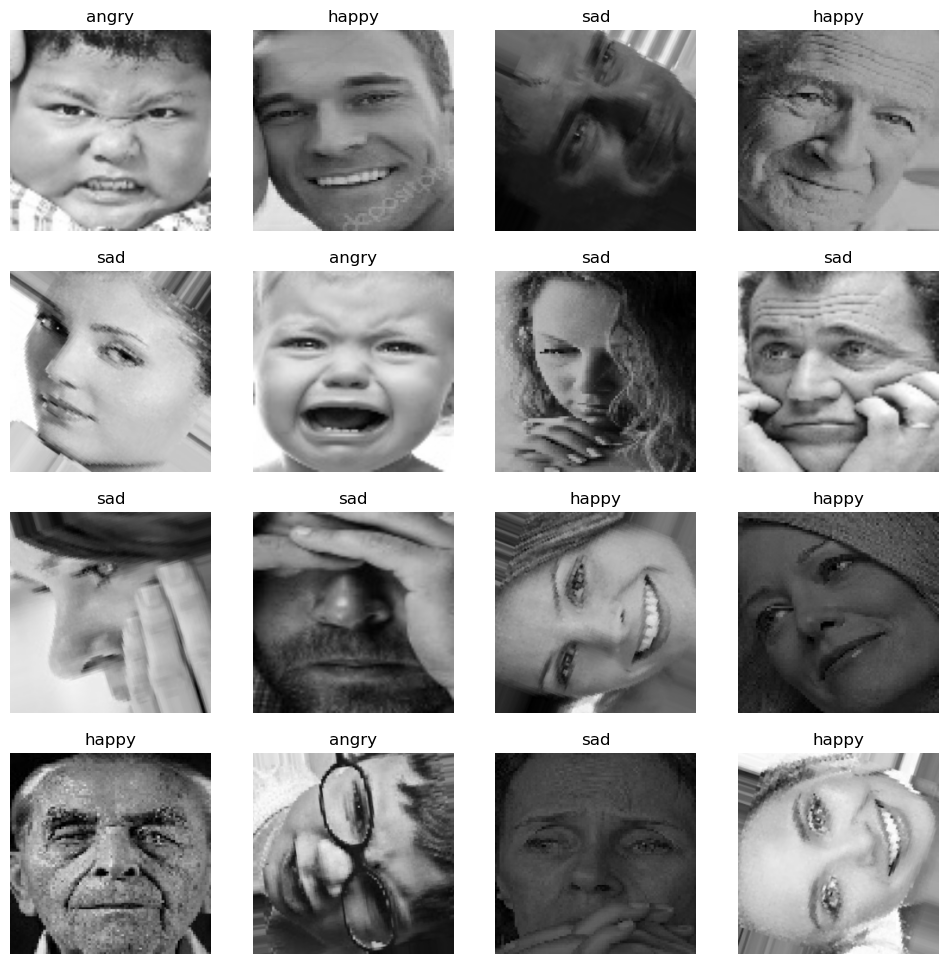

In [9]:
plt.figure(figsize = (12,12))

for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    plt.title(CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis = 0).numpy()])
    plt.axis("off")

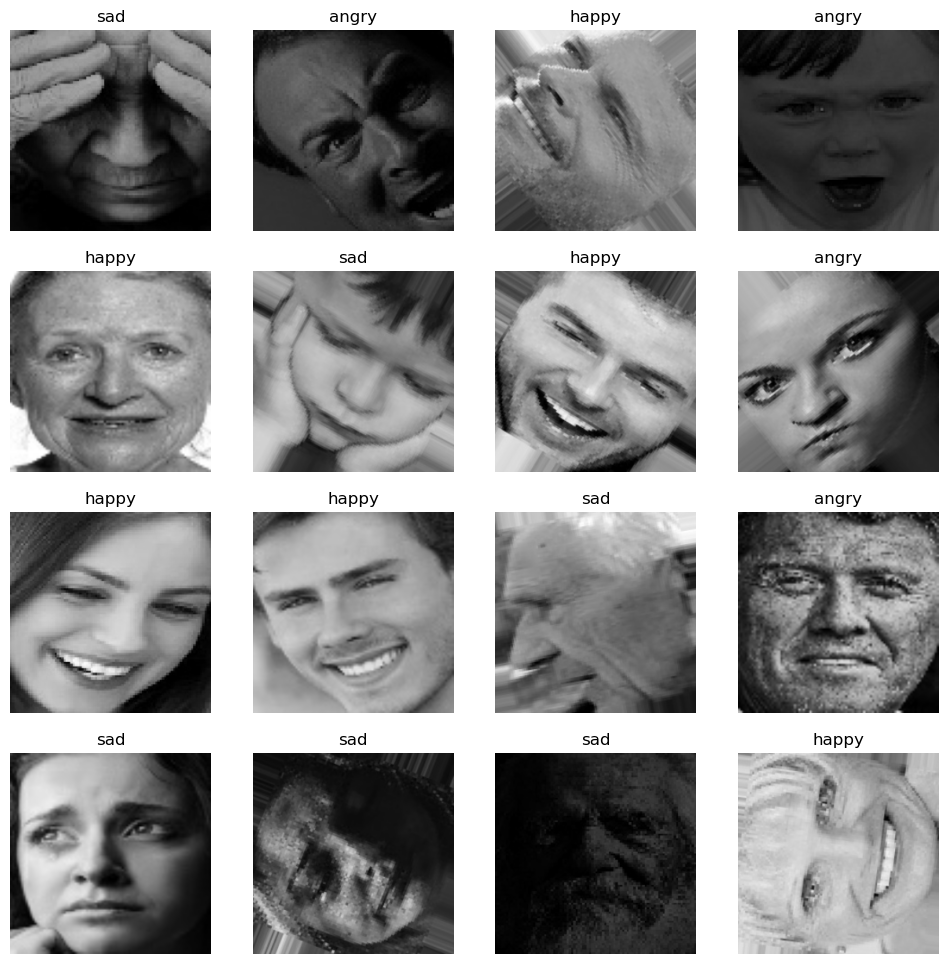

In [10]:
plt.figure(figsize = (12,12))

for images, labels in val_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    plt.title(CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis = 0).numpy()])
    plt.axis("off")

# Data Augumentation

In [75]:
augment_layers=tf.keras.Sequential([
    RandomRotation(factor=(-0.025,0.025),),
    RandomFlip(mode='horizontal'),
    RandomContrast(factor=0.1)
])

In [76]:
def augment_layer(image,label):
    return augment_layers(image,training=True),label

# Dataset preparation 

In [77]:
training_dataset=(
    train_dataset
    .map(augment_layer, num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE))

In [78]:
validation_dataset=(
    val_dataset
    .prefetch(tf.data.AUTOTUNE))

In [65]:
resize_rescale_layers = tf.keras.Sequential([
       Resizing(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
       Rescaling(1./255),
])

# Model

In [66]:
IM_SIZE=256
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

    resize_rescale_layers,

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 6)       168       
                                                                 
 batch_normalization_4 (Bat  (None, 254, 254, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 6)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 127, 127, 6)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 16)     

# Training

In [67]:
from tensorflow.keras.metrics import TopKCategoricalAccuracy ,CategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [68]:
# proble i dentified CategoricalAccuracy krna hai har jaga 

In [69]:
metrics = [CategoricalAccuracy(name='accuracy') ,TopKCategoricalAccuracy(k=2 , name='top_k_accuracy')]

In [70]:
loss_function=CategoricalCrossentropy()

In [71]:
lenet_model.compile(
    optimizer=Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
    loss=loss_function,
    metrics=metrics ,
)

In [79]:
history =lenet_model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=CONFIGURATION['N_EPOCHS'],
    verbose=1,
)

Epoch 1/20
201/201 [==============================] - 9s 41ms/step - loss: 1.0222 - accuracy: 0.5863 - top_k_accuracy: 0.8404 - val_loss: 0.8529 - val_accuracy: 0.6222 - val_top_k_accuracy: 0.8525
Epoch 2/20
201/201 [==============================] - 9s 41ms/step - loss: 0.7386 - accuracy: 0.6737 - top_k_accuracy: 0.8929 - val_loss: 0.8358 - val_accuracy: 0.6270 - val_top_k_accuracy: 0.8669
Epoch 3/20
201/201 [==============================] - 9s 41ms/step - loss: 0.6569 - accuracy: 0.7236 - top_k_accuracy: 0.9100 - val_loss: 0.7122 - val_accuracy: 0.6799 - val_top_k_accuracy: 0.8975
Epoch 4/20
201/201 [==============================] - 9s 42ms/step - loss: 0.6108 - accuracy: 0.7454 - top_k_accuracy: 0.9255 - val_loss: 0.7360 - val_accuracy: 0.6821 - val_top_k_accuracy: 0.8862
Epoch 5/20
201/201 [==============================] - 9s 42ms/step - loss: 0.5591 - accuracy: 0.7720 - top_k_accuracy: 0.9341 - val_loss: 0.7403 - val_accuracy: 0.6891 - val_top_k_accuracy: 0.8849
Epoch 6/20
201/

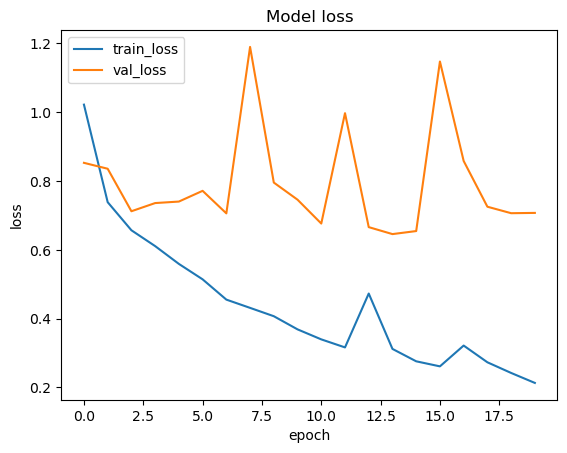

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

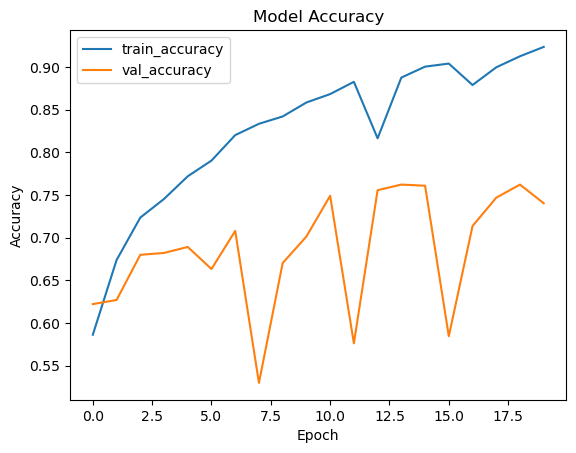

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [23]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Evalutaion

In [26]:
lenet_model.evaluate(validation_dataset)

72/72 [==============================] - 1s 18ms/step - loss: 1.1558 - accuracy: 0.7110 - top_k_accuracy: 0.8888


[1.1557796001434326, 0.711033284664154, 0.8887916207313538]

# Testing 

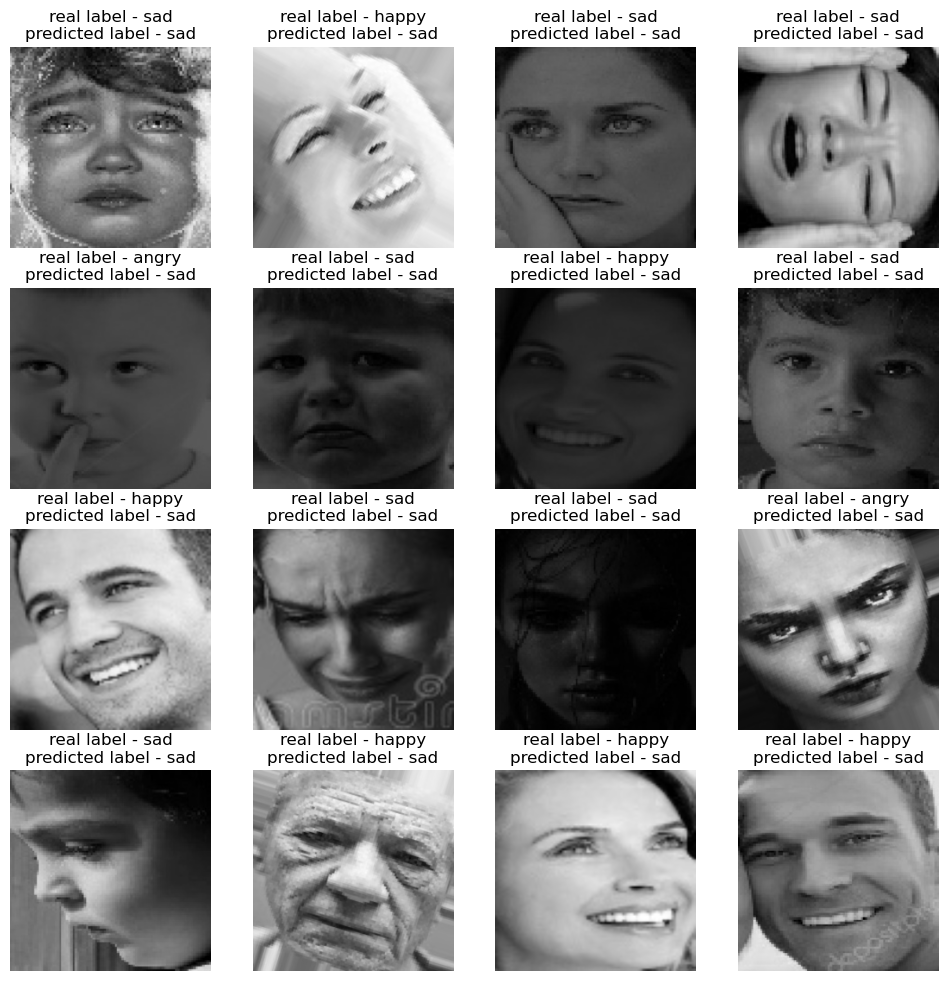

In [30]:
plt.figure(figsize=(12, 12))

for images, labels in train_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i] / 255.)
        plt.title('real label - ' + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=0).numpy()] + '\n' +
                  'predicted label - ' + CONFIGURATION["CLASS_NAMES"][tf.argmax(lenet_model(images), axis=-1).numpy()[0]])
        plt.axis("off")


# confusion Matrix

In [53]:
predicted=[]
labels=[]

for im, label in validation_dataset:
    predicted.append(lenet_model(im))
    labels.append(label.numpy())

In [54]:
print(np.argmax(labels[:-1],axis=-1).flatten())
print(np.argmax(predicted[:-1],axis=-1).flatten())

[2 0 1 ... 2 1 1]
[2 0 1 ... 0 2 2]


In [55]:
pre=np.concatenate([np.argmax(predicted[:-1],axis=-1).flatten(),np.argmax(predicted[-1],axis=-1).flatten()])
lab=np.concatenate([np.argmax(labels[:-1],axis=-1).flatten(),np.argmax(labels[-1],axis=-1).flatten()])

In [52]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

[[329  83 103]
 [ 73 765 168]
 [111 122 530]]


Text(0.5, 58.7222222222222, 'Predicted')

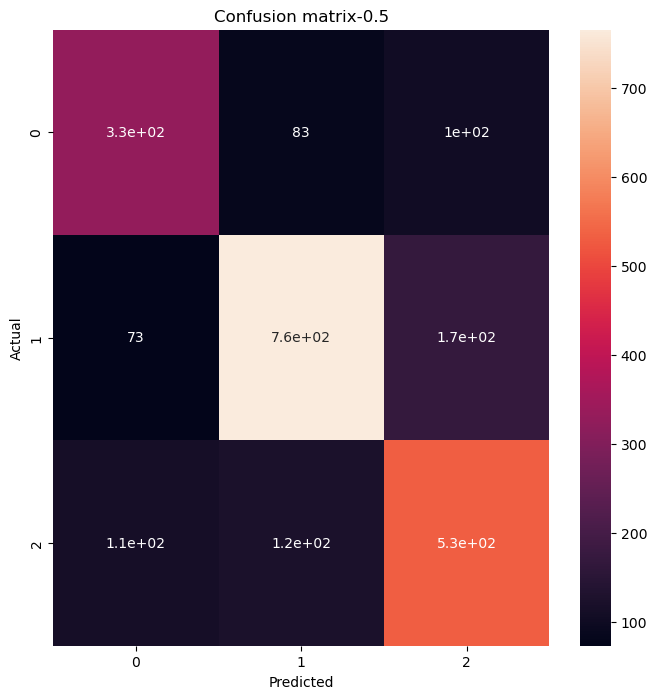

In [56]:
threshold=0.5
cm=confusion_matrix(lab, pre)
print(cm)
plt.figure(figsize=(8,8))

sns.heatmap(cm, annot=True)
plt.title('Confusion matrix-{}'.format(threshold))
plt.ylabel('Actual')
plt.xlabel('Predicted')